<b>Заголовок</b>: Исследование магазина игр "Стримчик".

<b>Описание проекта</b>: Магазин "Стримчик" продаёт игры по всему миру. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию.

<b>Цель исследования</b>: нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

<b>Ход исследования</b>:

* Подготовка данных: загрузка и изучение общей информации из предоставленных датасетов
* Предобработка данных: обработка пропущенных значений, корректировка типа даных, дубликатов.
* Исследовательский анализ данных: изучение основных параметров объектов, их распределения.
* Составление портрета пользователя каждого региона
* Проверка гипотез

<b>Общий вывод</b>: резюмирование полученных результатов, формулировка ключевых выводов.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats as st
import numpy as np

#### Шаг 1. Подготовка данных

In [2]:
games_data = pd.read_csv('/datasets/games.csv')

In [3]:
games_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
games_data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


При первом знакомстве с данными видно, что в данных есть пропуски, датафрейм состоит из 16715 строк и 11 колонок.

#### Шаг 2. Подготовка данных

##### Замена регистра

In [5]:
games_data.columns = games_data.columns.str.lower()

In [6]:
games_data['year_of_release'] = games_data['year_of_release'].fillna(0.0).astype(int)
games_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Привёл столбец с датой релизой к целочисленному типу данных, потому что год не может быть вещественным значением. Пропуски в этом столбце заменим нулём. У остальных столбцов тип данных заменять не следует.

##### Обработка пропусков

In [7]:
games_data[games_data['genre'].isna() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [8]:
games_data['rating'] = games_data['rating'].fillna(0)

Здесь жанр ничем не заменить, нет даже названия игры (только в этих двух строчках есть пропуск в столбце названия игры).

Мне кажется, что стоит заменять значения NaN в столбцах critic_score, user_score, rating на 0, чтобы не было затруднений при дальнейшей работе. Возможно, пропуски появились, из-за того, что оценку не выдали, потому что продаж было слишком мало.

##### TBD

In [9]:
games_data['user_score'][games_data['user_score'] == 'tbd'] = 0
games_data['user_score'].unique()

/tmp/ipykernel_168/3989797529.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games_data['user_score'][games_data['user_score'] == 'tbd'] = 0


array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 0, '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Значение tbd расшифровывается как "To be determined", то есть ещё не решено, какое будет значение. Мне кажется, что его следует оставить, так как рейтинг ещё не известен. Я не вижу причин, чтобы заменять его медианой или средним, строчек со значение tbd около двух тысяч, что составляет существенную доли от 16000.

##### Суммарные продажи

In [10]:
games_data['total_sales'] = games_data['na_sales'] + games_data['eu_sales'] + games_data['jp_sales'] + games_data['other_sales']

Добавил столбец с суммарными продажами, сложив значения na_sales, eu_sales, jp_sales, other_sales.

#### Шаг 3. Исследовательский анализ данных

##### Сколько игр выпускалось в разные годы

,name
year_of_release,
1994,121
1995,219
1996,263
1997,289
1998,379
1999,338
2000,350
2001,482
2002,829


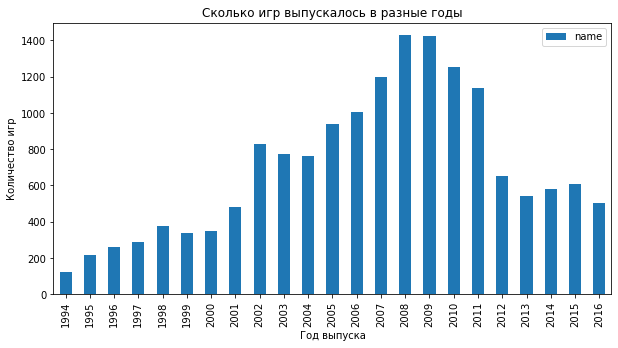

In [11]:
good_games_data = games_data[games_data['year_of_release'] >= 1994].pivot_table(index='year_of_release', values='name', aggfunc='count')
good_games_data.plot(kind='bar', figsize=(10, 5), title='Сколько игр выпускалось в разные годы', xlabel='Год выпуска',\
                    ylabel='Количество игр');
good_games_data

Данные до 1994 года не важно, так как выпускалось очень мало игр в год до этого времени. В 1994 начали выпускать больше игр.

С 1994 года количество выпущенных игр в год становилось всё больше и больше. Больше всего игр выпустили в 2008 и 2009 - около 1400 в каждый из этих годов. Затем, тенденция пошла на спад.

##### Продажи по платформам

In [12]:
games_data[games_data['year_of_release'] > 2013].pivot_table(index='platform', values='total_sales', aggfunc='sum').\
sort_values(by='total_sales', ascending=False).head(5)

,total_sales
platform,
PS4,288.15
XOne,140.36
3DS,86.68
PS3,68.18
X360,48.22


Возьмём первые пять консолей. PS2, X360, PS3, Wii, DS

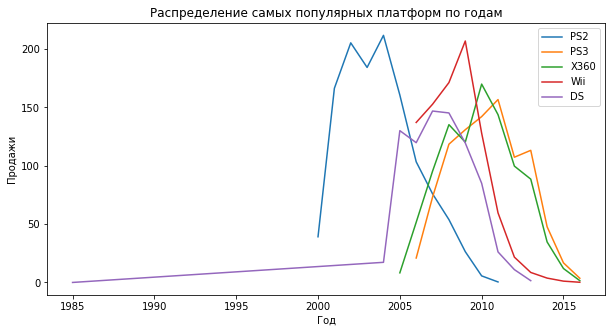

In [13]:
consoles = ['PS2', 'PS3', 'X360', 'Wii', 'DS']
plt.figure(figsize=(10, 5))
for i in consoles:
    plt.plot(games_data[(games_data['platform'] == i) & (games_data['year_of_release'] != 0)]\
             .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum'))

plt.legend(('PS2', 'PS3', 'X360', 'Wii', 'DS'))
plt.xlabel('Год')
plt.ylabel('Продажи')
plt.title('Распределение самых популярных платформ по годам')
plt.show()

Смотря на график PS2 и Wii, хочется сказать, что характерный срок, за который появляются новые - 5 лет, а срок, за который исчезают старые - 10 лет. исчезают старые платформы - 10 лет. Вместе с PS3 появлися X360 и Wii.

##### Данные за актуальный период

За актуальный период возьму время с 2013 года, тогда вышли две новые игровые платформы.

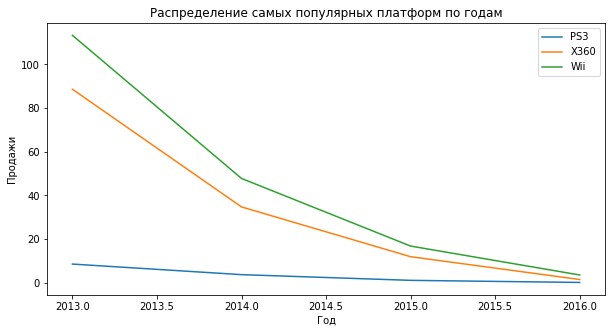

In [14]:
consoles = ['PS3', 'X360', 'Wii']
relative_data = games_data[games_data['year_of_release'] >= 2013]
relative_data.reset_index(drop=True)
plt.figure(figsize=(10, 5))
for i in range(-1, -4, -1):
    plt.plot(relative_data[relative_data['platform'] == consoles[i]]\
             .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum'))

plt.legend(('PS3', 'X360', 'Wii'))
plt.xlabel('Год')
plt.ylabel('Продажи')
plt.title('Распределение самых популярных платформ по годам')
plt.show()

Wii и X360 лидируют по продажам. Все консоли опустились примерно до одного уровня к 2016.

##### Ящики с усами

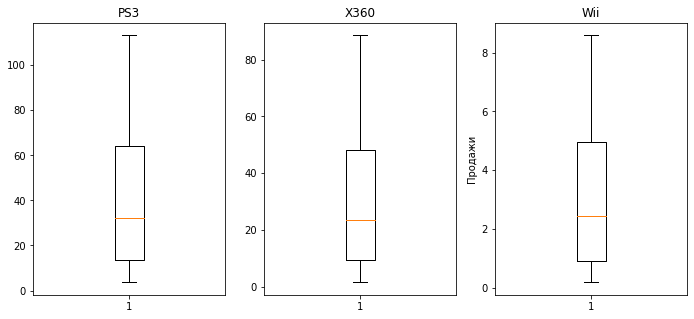

In [15]:
plt.figure(figsize=(20, 5))

for i in range(len(consoles)):
    plt.subplot(1, 5, i+1)
    plt.boxplot(relative_data[relative_data['platform'] == consoles[i]]\
             .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum'))
    plt.title(consoles[i])
    
plt.ylabel('Продажи')
plt.show()

##### PS3

In [16]:
relative_data[relative_data['platform'] == 'PS3']\
             .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').describe()

,total_sales
count,4.000000
mean,45.357500
std,48.898675
min,3.600000
25%,13.515000
50%,32.290000
75%,64.132500
max,113.250000


"Ящик с усами" PS3: Первый квартиль = 34.36, третий квартиль = 124.725, медиана = 107.36

##### X360

In [17]:
relative_data[relative_data['platform'] == 'X360']\
             .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').describe()

,total_sales
count,4.000000
mean,34.200000
std,38.816131
min,1.520000
25%,9.350000
50%,23.350000
75%,48.200000
max,88.580000


"Ящик с усами" X360: Первый квартиль = 29.045, третий квартиль = 124.0325, медиана = 91.995

##### WII

In [18]:
relative_data[relative_data['platform'] == 'Wii']\
             .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').describe()

,total_sales
count,4.000000
mean,3.415000
std,3.765355
min,0.180000
25%,0.900000
50%,2.445000
75%,4.960000
max,8.590000


"Ящик с усами" Wii: Первый квартиль = 6.17, третий квартиль = 144.96, медиана = 59.65

##### Влияние оценки пользователей на продажи (PS2)

In [19]:
relative_data = relative_data[relative_data['user_score'].isna() == False]
relative_data['user_score'] = relative_data['user_score'].astype('float')
relative_data = relative_data[relative_data['user_score'] != 0]

In [20]:
relative_data['user_score'].unique()

array([8.2, 8.1, 8.3, 2.6, 4.3, 5.7, 5. , 6.5, 9.1, 6.1, 7.9, 5.4, 8.4,
       6.4, 3.4, 8.5, 4.8, 9. , 4.9, 4.5, 6.2, 4.2, 6.3, 7.7, 9.2, 7.6,
       8.7, 6.7, 3.7, 7. , 6.9, 4.1, 5.8, 5.6, 6.8, 5.5, 7.5, 4.4, 5.9,
       7.2, 8.9, 3.9, 7.8, 3.2, 8.6, 3.1, 7.4, 7.3, 6.6, 6. , 4.7, 7.1,
       8.8, 5.1, 3. , 2.9, 2.7, 2.2, 8. , 3.5, 5.2, 5.3, 3.8, 4.6, 3.3,
       9.3, 4. , 3.6, 2.4, 2.8, 1.8, 1.7, 1.6, 2.1, 2. , 1.5, 0.7, 2.5,
       0.2, 1.9, 1.3, 1. , 1.4, 2.3])

##### Влияние оценки критиков на продажи (PS3)

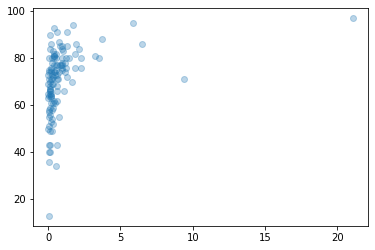

0.3338066356506173


In [21]:
plt.scatter(relative_data[relative_data['platform'] == "PS3"]['total_sales'],\
           relative_data[relative_data['platform'] == "PS3"]['critic_score'], alpha=0.3)
plt.show()

print(relative_data[relative_data['platform'] == "PS3"]['total_sales']\
      .corr(relative_data[relative_data['platform'] == "PS3"]['critic_score']))#коэф.корр.

Коэффициент корреляции в 0.43 говорит о том, что зависимость есть, но она не слишком сильная. Есть пара игр, у которых  высокие продажи и высокие оценки.

##### Влияние оценки пользователей на продажи (PS3)

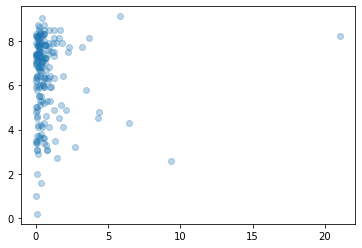

0.0023944027357566925


In [22]:
plt.scatter(relative_data[relative_data['platform'] == "PS3"]['total_sales'],\
           relative_data[relative_data['platform'] == "PS3"]['user_score'], alpha=0.3)
plt.show()

print(relative_data[relative_data['platform'] == "PS3"]['total_sales']\
      .corr(relative_data[relative_data['platform'] == "PS3"]['user_score']))#коэф.корр.#коэф.корр.

Корелляция отсутствует.

##### Влияние оценки критиков на продажи (X360)

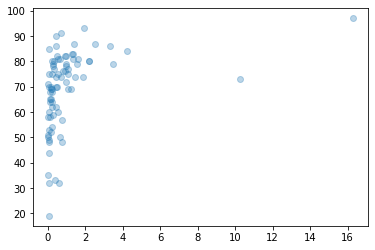

0.3503445460228664


In [23]:
plt.scatter(relative_data[relative_data['platform'] == "X360"]['total_sales'],\
           relative_data[relative_data['platform'] == "X360"]['critic_score'], alpha=0.3)
plt.show()

print(relative_data[relative_data['platform'] == "X360"]['total_sales']\
      .corr(relative_data[relative_data['platform'] == "X360"]['critic_score']))#коэф.корр..

Присутствует слабая зависимость.

##### Влияние оценки пользователей на продажи (X360)

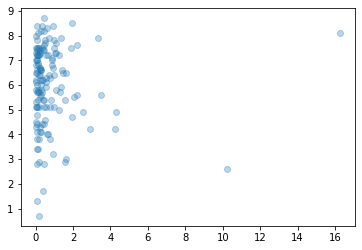

-0.011742185147181342


In [24]:
plt.scatter(relative_data[relative_data['platform'] == "X360"]['total_sales'],\
           relative_data[relative_data['platform'] == "X360"]['user_score'], alpha=0.3)
plt.show()

print(relative_data[relative_data['platform'] == "X360"]['total_sales']\
      .corr(relative_data[relative_data['platform'] == "X360"]['user_score']))#коэф.корр..

Корелляции нету.

##### Влияние оценки критиков на продажи (WII)

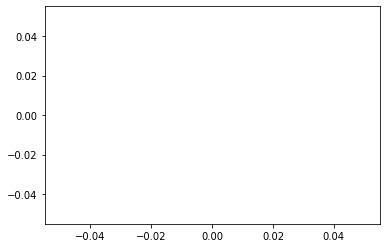

nan


In [25]:
plt.scatter(relative_data[relative_data['platform'] == "Wii"]['total_sales'],\
           relative_data[relative_data['platform'] == "Wii"]['critic_score'], alpha=0.3)
plt.show()

print(relative_data[relative_data['platform'] == "Wii"]['total_sales']\
      .corr(relative_data[relative_data['platform'] == "Wii"]['critic_score']))#коэф.корр..

Данных с оценками критиков за актуальный период нет.

##### Влияние оценки пользователей на продажи (WII)

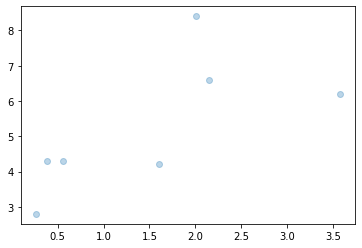

0.6829417215362368


In [26]:
plt.scatter(relative_data[relative_data['platform'] == "Wii"]['total_sales'],\
           relative_data[relative_data['platform'] == "Wii"]['user_score'], alpha=0.3)
plt.show()

print(relative_data[relative_data['platform'] == "Wii"]['total_sales']\
      .corr(relative_data[relative_data['platform'] == "Wii"]['user_score']))#коэф.корр..

Корелляция средняя.

##### Популярность жанров по продажам

In [27]:
good_relative_data = relative_data.pivot_table(index='genre', values='total_sales',\
                                               aggfunc='median').sort_values(by='total_sales', ascending=False)
good_relative_data.columns = ['median_sales']
good_relative_data

,median_sales
genre,
Shooter,0.520
Sports,0.435
Misc,0.325
Platform,0.250
Strategy,0.220
Action,0.200
Fighting,0.195
Role-Playing,0.180
Racing,0.170


Самые прибыльные жанры - Shooter, Sports, Misc. Жанры с самыми низкими продажами - Simulation, Puzzle, Adventure.

#### Шаг 4. Портрет пользователя каждого региона

##### Самые популярные платформы Японии

In [29]:
relative_data.pivot_table(index='platform', values='jp_sales', aggfunc='sum').\
sort_values(by='jp_sales', ascending=False).head(5)

,jp_sales
platform,
PS3,14.32
3DS,14.25
PS4,9.45
WiiU,8.36
PSV,6.61


PS3, 3DS, PS4, WiiU, PSV - топ 5 самых популярных консолей в Японии.

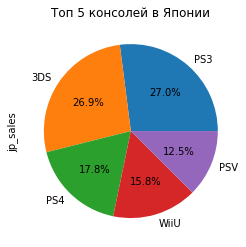

In [30]:
relative_data.pivot_table(index='platform', values='jp_sales', aggfunc='sum').\
sort_values(by='jp_sales', ascending=False).head(5).plot.pie(y='jp_sales', title="Топ 5 консолей в Японии", legend=False, \
                   autopct='%1.1f%%')
plt.show()

Доли 3DS и PS3 практически равны и занимают большую часть диаграммы вместе.

##### Самые популярные жанры Японии

In [31]:
relative_data.pivot_table(index='genre', values='jp_sales', aggfunc='sum').\
sort_values(by='jp_sales', ascending=False).head(5)

,jp_sales
genre,
Action,16.13
Role-Playing,13.68
Shooter,5.79
Platform,4.17
Misc,3.12


Action - самый популярный жанр Японии, Misc - занимает последнее место в топ-5.

##### ESRB в Японии

,jp_sales
rating,
T,0.01
0,0.00
E,0.00
E10+,0.00
M,0.00


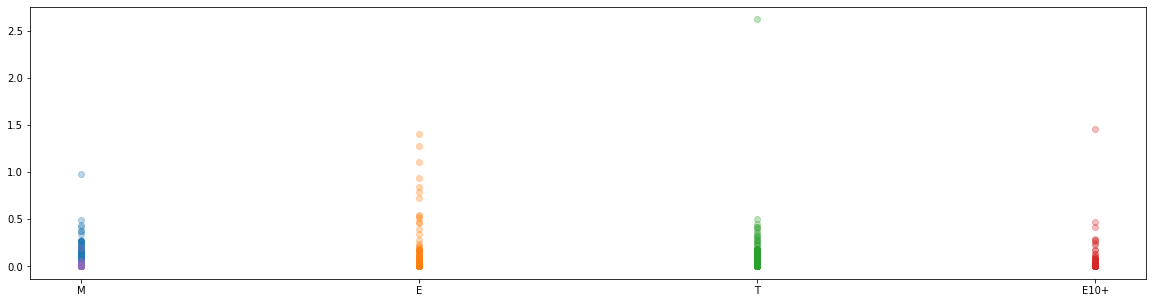

In [32]:
plt.figure(figsize=(20, 5))
for i in relative_data['rating'].unique():
    plt.scatter(relative_data[relative_data['rating'] == i]['rating'],\
               relative_data[relative_data['rating'] == i]['jp_sales'], alpha=0.3)

relative_data.pivot_table(index='rating', values='jp_sales', aggfunc='median').\
sort_values(by='jp_sales', ascending=False).head(5)

Игры с рейтингом T продаются больше всего в Японии.

##### Самые популярные платформы Европы

In [33]:
relative_data.pivot_table(index='platform', values='eu_sales', aggfunc='sum').\
sort_values(by='eu_sales', ascending=False).head(5)

,eu_sales
platform,
PS4,112.78
PS3,59.19
XOne,43.34
X360,36.19
PC,22.16


PS4, PS3, XOne, X360, PC - самые популярные консоли в Европе.

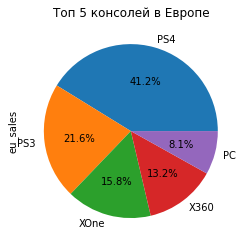

In [34]:
relative_data.pivot_table(index='platform', values='eu_sales', aggfunc='sum').\
sort_values(by='eu_sales', ascending=False).head(5).plot.pie(y='eu_sales', title="Топ 5 консолей в Европе", legend=False, \
                   autopct='%1.1f%%')
plt.show()

PS4 занимает практически половину диаграммы.

##### Самые популярные жанры Европы

In [35]:
relative_data.pivot_table(index='genre', values='eu_sales', aggfunc='sum').\
sort_values(by='eu_sales', ascending=False).head(5)

,eu_sales
genre,
Action,100.49
Shooter,71.00
Sports,59.38
Role-Playing,19.82
Racing,17.46


Action - самый популярный жанр игр в Европе, Racing замыкает топ-5.

##### ESRB в Европе

,eu_sales
rating,
M,0.13
E10+,0.12
E,0.08
T,0.04
0,0.03


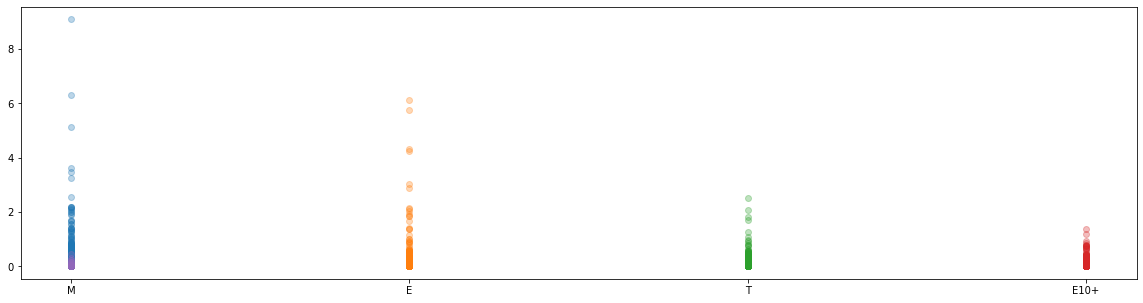

In [36]:
plt.figure(figsize=(20, 5))
for i in relative_data['rating'].unique():
    plt.scatter(relative_data[relative_data['rating'] == i]['rating'],\
               relative_data[relative_data['rating'] == i]['eu_sales'], alpha=0.3)

relative_data.pivot_table(index='rating', values='eu_sales', aggfunc='median').\
sort_values(by='eu_sales', ascending=False).head(5)

Игры с рейтингом M продаются больше всего в Европе.

##### Самые популярные платформы Северной Америки

In [37]:
relative_data.pivot_table(index='platform', values='na_sales', aggfunc='sum').\
sort_values(by='na_sales', ascending=False).head(5)

,na_sales
platform,
PS4,84.66
XOne,78.61
X360,69.29
PS3,55.29
WiiU,23.54


PS4, XOne, X360, PS3, WiiU - самые популярные консоли в Северной Америке.

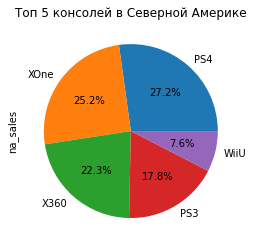

In [38]:
relative_data.pivot_table(index='platform', values='na_sales', aggfunc='sum').\
sort_values(by='na_sales', ascending=False).head(5).plot.pie(y='na_sales', title="Топ 5 консолей в Северной Америке",\
                                                             legend=False, autopct='%1.1f%%')
plt.show()

XOne и PS4 занимают большую долю диаграммы. WiiU занимает меньше всего.

##### Самые популярные жанры Северной Америки

In [39]:
relative_data.pivot_table(index='genre', values='na_sales', aggfunc='sum').\
sort_values(by='na_sales', ascending=False).head(5)

,na_sales
genre,
Action,108.43
Shooter,90.15
Sports,64.14
Role-Playing,24.02
Platform,15.53


Action - самый популярный жанр игр в Северной Америке, Platform замыкает топ-5.

##### ESRB в Северной Америке

In [40]:
relative_data.pivot_table(index='rating', values='na_sales', aggfunc='median').\
sort_values(by='na_sales', ascending=False).head(5)

,na_sales
rating,
E10+,0.16
M,0.14
E,0.08
T,0.05
0,0.00


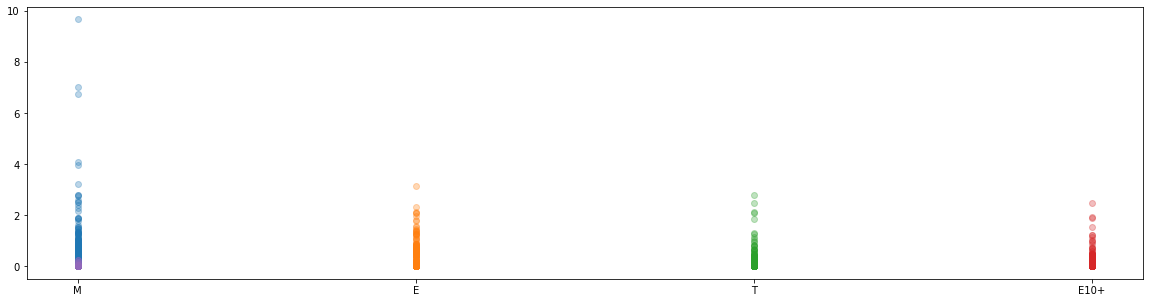

In [41]:
plt.figure(figsize=(20, 5))
for i in relative_data['rating'].unique():
    plt.scatter(relative_data[relative_data['rating'] == i]['rating'],\
               relative_data[relative_data['rating'] == i]['na_sales'], alpha=0.3)

Игры с рейтингом E10+ продаются лучше всех в Северной Америке.

#### Шаг 5. Проверка гипотез

In [42]:
relative_data['user_score'].isna().sum()

0

In [43]:
relative_data = relative_data[relative_data['critic_score'].isna() == False]

##### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Нулевая гипотеза: Средние пользовательский рейтинг платформы Xbox One == средний пользовательский рейтинг платформы PC

Альтернативная гипотеза: Средние пользовательский рейтинги Xbox One и PC различаются.

In [44]:
alpha = 0.05

results = st.ttest_ind(relative_data[relative_data['platform'] == 'XOne']['user_score'],\
                       relative_data[relative_data['platform'] == 'PC']['user_score'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.17306926618147322
Не получилось отвергнуть нулевую гипотезу


Здесь используем метод для двух независимых выборок. Проверяется двусторонняя гипотеза

##### Средние пользовательские рейтинги жанров Action и Sports  разные.

Нулевая гипотеза: Средний пользовательский рейтинг жанра Action == средний пользовательский рейтинг жанра Sports

Альтернативная гипотеза: Средние пользовательские рейтинги жанров Action и Sports различаются.

In [45]:
alpha = 0.05

results = st.ttest_ind(relative_data[relative_data['genre'] == 'Action']['user_score'],\
                       relative_data[relative_data['genre'] == 'Sports']['user_score'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу о том, что cредние пользовательские рейтинги жанров Action и Sports одинаковые')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.684099430689953e-16
Отвергаем нулевую гипотезу о том, что cредние пользовательские рейтинги жанров Action и Sports одинаковые


Здесь используем метод для двух независимых выборок. Проверяется двусторонняя гипотеза

# Общий вывод

<b>1. Загрузка данных</b>

В начале работы мы получили таблицу, состоющую из 16715 строк и 11 столбцов соответственно.

<b>2. Предобработка данных</b>

* Был заменён регистр названий всех строк на нижний
* Были обработаны пропуски
* Было принято решение убрать значение tbd в столбце user_score
* Был добавлен столбец с суммарными продажами


<b>3. Исследовательский анализ данных</b>

Затем осуществлялся исследовательский анализ данных с помощью гистограмм. Выяснилось, что:
* В 2008 и 2009 выпускалось больше всего игр
* 10 лет - характерный срок за который исчезают старые консоли, а 5 лет - срок, за который появляются новые.
* Потенциально прибыльные платформы: PS3 и Xbox 360
* Зависимость продаж от оценки критиков есть, но она либо не очень сильная, либо совсем слабая. Кроме корелляции между оценкой пользователей и продажами игры на Wii, там средняя корелляция.
* Самые прибыльные жанры - Shooter, Sports, Misc. Жанры с высокими и низкими продажами выделяются, например, Strategy и Adventure - жанры с самыми низкими продажами.

<b>4. Портрет пользователя региона</b>

Далее происходило составление портрета пользователя. Выяснилось следующее:

* Япония: больше всего продаж приходятся на платформу PS3 и жанр Action.
* Европа: больше всего продаж приходятся на платформы PS4, и жанр Action.
* Северная Америка: больше всего продаж приходятся на платформу PS4, и жанр Action.


<b>5. Проверка гипотез</b>
* Мы отвергли нулевую гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые в пользу альтернативной. Альтернативная гипотеза: средний пользовательский рейтинг Xbox One и PC не равны друг другу.
* У нас не получилось отвергнуть нулевую гипотезу о том, что что cредние пользовательские рейтинги жанров Action и Sports одинаковые